<a href="https://colab.research.google.com/github/Parthpatil294/ML_6D_1BM23CS227/blob/main/LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the California housing dataset from "https://media.geeksforgeeks.org/wp-content/uploads/20240319120216/housing.csv". Perform data overview, visualize features and geographical data, conduct correlation analysis, create new features, clean the data, convert categorical features, discuss feature scaling, and design an end-to-end machine learning pipeline for predicting housing prices. Finally, summarize the entire process.

## Download Dataset

### Subtask:
Download the California housing price dataset from the provided URL: https://media.geeksforgeeks.org/wp-content/uploads/20240319120216/housing.csv and load it into a pandas DataFrame.


**Reasoning**:
To download the dataset and load it into a pandas DataFrame, I need to first import the pandas library, define the URL for the dataset, and then use `pd.read_csv()` to load the data. Displaying the head of the DataFrame will confirm successful loading.



In [ ]:
import pandas as pd

# Define the URL for the housing dataset
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240319120216/housing.csv'

# Load the dataset into a pandas DataFrame
housing_df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print('Housing dataset loaded successfully. First 5 rows:')
print(housing_df.head())

Housing dataset loaded successfully. First 5 rows:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


## Perform Data Overview

### Subtask:
Execute the `describe()` and `info()` methods on the loaded DataFrame to get a statistical summary and information about data types and missing values.


**Reasoning**:
To fulfill the subtask, I will use the `info()` method to display a concise summary of the DataFrame, including data types and non-null values, and then use the `describe()` method to generate descriptive statistics for numerical columns.



In [ ]:
print('DataFrame Info:')
housing_df.info()

print('\nDescriptive Statistics:')
print(housing_df.describe())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

Descriptive Statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081 

## Plot Feature Histograms

### Subtask:
Generate histograms for all numerical features in the dataset. Specifically, analyze and discuss what the histograms indicate about 'median_income' and 'housing_median_age'.


**Reasoning**:
To generate histograms for all numerical features, I need to import `matplotlib.pyplot`, select the numerical columns from the DataFrame, and then use the `hist()` method to plot them. `plt.tight_layout()` will ensure proper display of the plots.



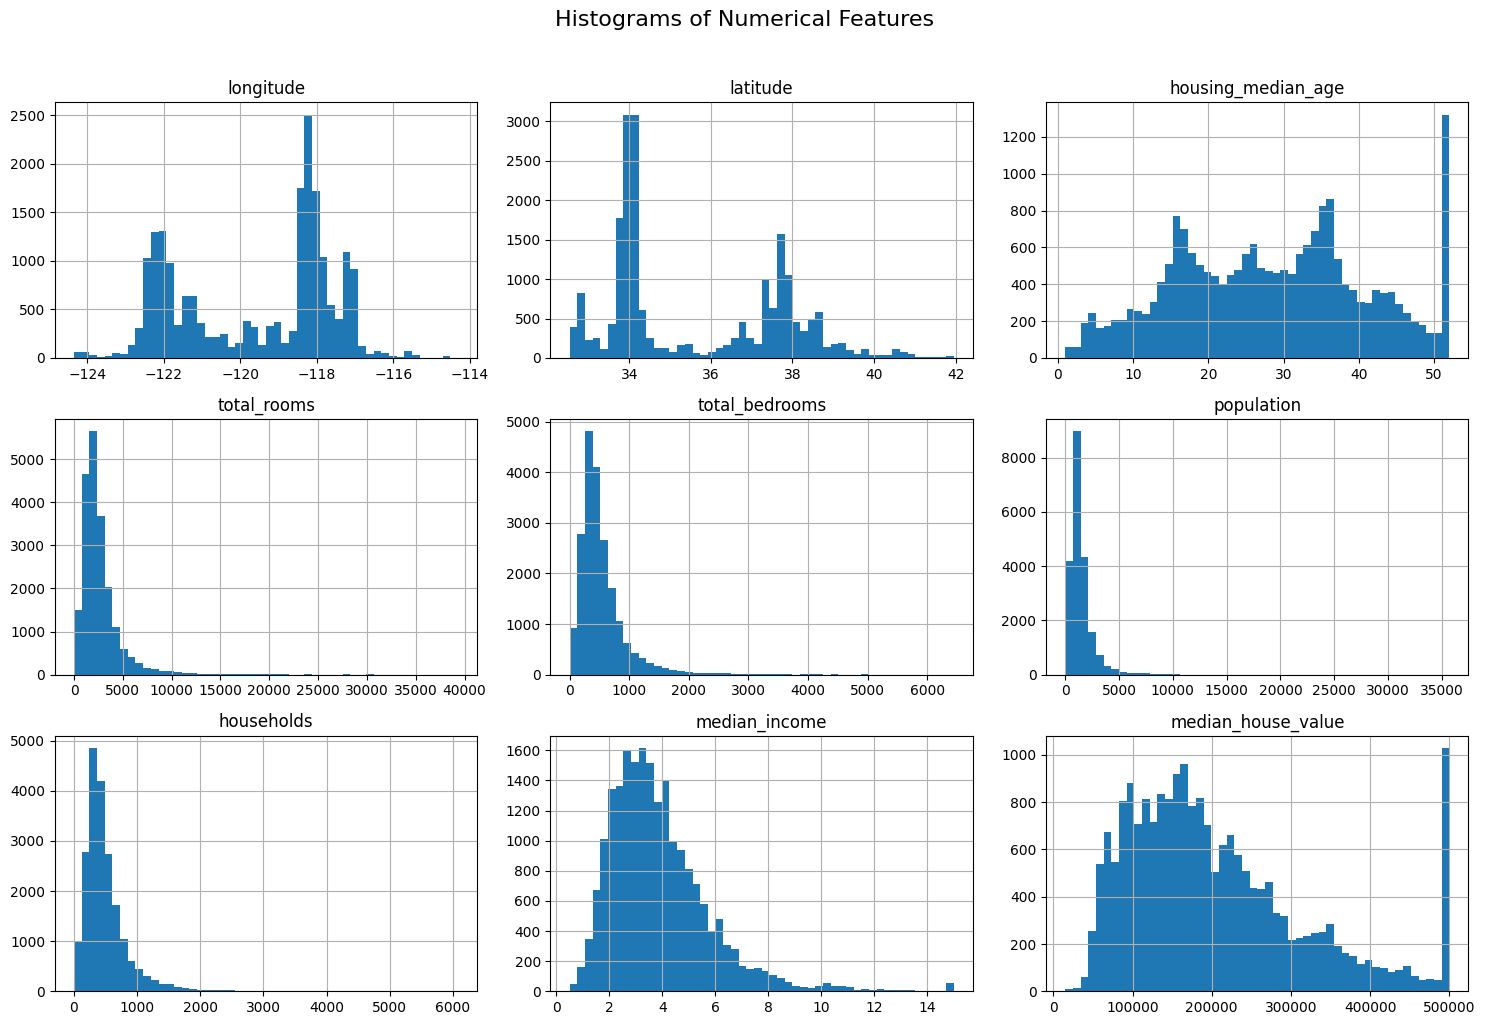

Histograms of numerical features displayed successfully.


In [ ]:
import matplotlib.pyplot as plt

# Select numerical columns
num_cols = housing_df.select_dtypes(include=['float64', 'int64'])

# Plot histograms for all numerical columns
num_cols.hist(figsize=(15, 10), bins=50)
plt.suptitle('Histograms of Numerical Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()
print("Histograms of numerical features displayed successfully.")

### Analysis of Histograms

**Median Income:**
The `median_income` histogram shows a right-skewed distribution, meaning the bulk of the values are concentrated on the lower side, with a tail extending towards higher incomes. This indicates that most districts have a lower to moderate median income, while fewer districts have very high median incomes. The distribution appears to be capped at around 15, and there is a noticeable peak around the 3-4 range. This skewness suggests that for models sensitive to normally distributed data, a transformation might be beneficial.

**Housing Median Age:**
The `housing_median_age` histogram exhibits a fairly uniform distribution for most of its range, but with clear peaks at both ends: 1 and 52. The peak at 52 suggests that housing values for many older districts have been capped, meaning all districts older than 52 years are simply recorded as 52. Similarly, the peak at 1 could indicate a large number of very new developments or a minimum age cap. The distribution generally shows a good spread across different ages, indicating a mix of old and new housing developments across California.

## Create Test Set

### Subtask:
Demonstrate the process of creating a test set. Explain the difference between random sampling and stratified sampling, and implement a suitable method for this dataset.


### 1. Explanation of Test Set Creation

Creating a test set is a fundamental step in any machine learning project. The primary goal is to evaluate the performance of a trained model on unseen data. By splitting the dataset into a training set and a test set, we ensure that the model is not evaluated on the same data it was trained on.

**Why is it crucial?**

1.  **Generalization Assessment**: It helps assess how well the model generalizes to new, unobserved data. A model that performs well on the training data but poorly on the test data is likely overfitting.
2.  **Unbiased Evaluation**: It provides an unbiased estimate of the model's performance. If we used the training data for evaluation, the performance metrics would be optimistically biased.
3.  **Preventing Data Leakage**: It helps prevent data leakage, where information from the test set inadvertently "leaks" into the training process, leading to overly optimistic performance estimates.

Typically, the dataset is split into a larger training set (e.g., 70-80%) and a smaller test set (e.g., 20-30%). The training set is used to train the model, while the test set is kept entirely separate and only used for final evaluation after the model has been trained and hyperparameters tuned.

### 2. Random Sampling vs. Stratified Sampling

When splitting a dataset into training and test sets, there are primarily two common sampling methods:

#### Random Sampling

*   **Description**: In purely random sampling, each instance in the dataset has an equal chance of being selected for either the training or test set. This is often done using functions like `train_test_split` from `sklearn.model_selection` without any `stratify` parameter.
*   **When to Use**: Random sampling is generally suitable for large datasets where the dataset is representative of the overall population, and there's no concern about specific subgroups being under- or over-represented in either the training or test set by chance. It assumes that the random selection will naturally distribute key characteristics across both sets proportionally.
*   **Limitations**: For smaller datasets, or when certain features are critical and have skewed distributions, random sampling might lead to a biased split. For example, if a dataset has only a few instances of a rare class, random sampling might put all of them into the training set, leaving the test set without any examples of that class, or vice-versa.

#### Stratified Sampling

*   **Description**: Stratified sampling involves dividing the population into homogeneous subgroups (called strata) and then drawing samples from each stratum in proportion to their size in the overall population. This ensures that the training and test sets are representative of the full dataset with respect to these crucial features.
*   **When to Use**: Stratified sampling is essential when you have a feature (or features) that are particularly important for your model and whose distribution you want to preserve in both the training and test sets. This is often the case with target variables or key categorical features that might be unevenly distributed. It is especially useful for maintaining class balance in classification problems or ensuring representative ranges of continuous features in regression problems.
*   **Advantage**: It prevents the risk of significant sampling bias for important features, which could happen by chance with pure random sampling, particularly in smaller datasets or when dealing with imbalanced distributions. This leads to more reliable model evaluation.

For this housing dataset, if we believe that `median_income` (or any other feature) plays a crucial role in predicting `median_house_value`, it's wise to use stratified sampling to ensure that the training and test sets accurately reflect the different income categories present in the full dataset.

### 2. Random Sampling vs. Stratified Sampling

When splitting a dataset into training and test sets, there are primarily two common sampling methods:

#### Random Sampling

*   **Description**: In purely random sampling, each instance in the dataset has an equal chance of being selected for either the training or test set. This is often done using functions like `train_test_split` from `sklearn.model_selection` without any `stratify` parameter.
*   **When to Use**: Random sampling is generally suitable for large datasets where the dataset is representative of the overall population, and there's no concern about specific subgroups being under- or over-represented in either the training or test set by chance. It assumes that the random selection will naturally distribute key characteristics across both sets proportionally.
*   **Limitations**: For smaller datasets, or when certain features are critical and have skewed distributions, random sampling might lead to a biased split. For example, if a dataset has only a few instances of a rare class, random sampling might put all of them into the training set, leaving the test set without any examples of that class, or vice-versa.

#### Stratified Sampling

*   **Description**: Stratified sampling involves dividing the population into homogeneous subgroups (called strata) and then drawing samples from each stratum in proportion to their size in the overall population. This ensures that the training and test sets are representative of the full dataset with respect to these crucial features.
*   **When to Use**: Stratified sampling is essential when you have a feature (or features) that are particularly important for your model and whose distribution you want to preserve in both the training and test sets. This is often the case with target variables or key categorical features that might be unevenly distributed. It is especially useful for maintaining class balance in classification problems or ensuring representative ranges of continuous features in regression problems.
*   **Advantage**: It prevents the risk of significant sampling bias for important features, which could happen by chance with pure random sampling, particularly in smaller datasets or when dealing with imbalanced distributions. This leads to more reliable model evaluation.

For this housing dataset, if we believe that `median_income` (or any other feature) plays a crucial role in predicting `median_house_value`, it's wise to use stratified sampling to ensure that the training and test sets accurately reflect the different income categories present in the full dataset.

### 3. Identifying a Suitable Feature for Stratified Sampling: `median_income`

Based on the initial data overview and the histograms generated previously, `median_income` stands out as a crucial feature for stratified sampling. Here's why:

*   **Strong Correlation with Target Variable**: It is generally understood that `median_income` is a strong predictor of `median_house_value`. Districts with higher median incomes tend to have higher housing prices. Therefore, it's vital to ensure that both the training and test sets accurately represent the various income levels present in the full dataset.

*   **Skewed Distribution**: The histogram for `median_income` showed that its distribution is not perfectly uniform; it's skewed to the right, with a long tail. If we were to use purely random sampling, there's a risk that certain income brackets (especially the higher ones, which are less frequent) might be disproportionately represented or even entirely missing in either the training or test set by pure chance. This could lead to a biased evaluation of the model's performance, particularly for homes in those income ranges.

*   **Preserving Representativeness**: By stratifying based on `median_income`, we ensure that the proportion of instances from each income category is roughly the same in the training set and the test set as it is in the overall dataset. This helps to create a test set that is truly representative of the overall population, leading to a more reliable and less biased evaluation of the model's generalization capabilities.

**Reasoning**:
Now, I will create an income category column from `median_income` by dividing it by a constant, capping the values, and then displaying the value counts for the new column to verify the distribution of categories, as specified in instruction #4 of the subtask. This step is necessary to prepare the data for stratified sampling.



In [ ]:
import numpy as np

# Create an income category column
housing_df['income_cat'] = np.ceil(housing_df['median_income'] / 1.5)

# Cap income categories at 5 and merge higher categories into 5
housing_df['income_cat'].where(housing_df['income_cat'] < 5, 5.0, inplace=True)

print("Income Category Distribution:")
print(housing_df['income_cat'].value_counts())
print("\nIncome Category Proportions:")
print(housing_df['income_cat'].value_counts() / len(housing_df))


Income Category Distribution:
income_cat
3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: count, dtype: int64

Income Category Proportions:
income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64


/tmp/ipython-input-3733237633.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_df['income_cat'].where(housing_df['income_cat'] < 5, 5.0, inplace=True)


**Reasoning**:
The previous code block produced a `FutureWarning` due to the use of `inplace=True` with a chained assignment. To address this warning and ensure compatibility with future pandas versions, I will modify the line to explicitly reassign the result of the `where` operation back to the column, instead of using `inplace=True`.



In [ ]:
import numpy as np

# Create an income category column
housing_df['income_cat'] = np.ceil(housing_df['median_income'] / 1.5)

# Cap income categories at 5 and merge higher categories into 5
housing_df['income_cat'] = housing_df['income_cat'].where(housing_df['income_cat'] < 5, 5.0)

print("Income Category Distribution:")
print(housing_df['income_cat'].value_counts())
print("\nIncome Category Proportions:")
print(housing_df['income_cat'].value_counts() / len(housing_df))

Income Category Distribution:
income_cat
3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: count, dtype: int64

Income Category Proportions:
income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64


**Reasoning**:
As per instruction #5, I need to import the `StratifiedShuffleSplit` class from `sklearn.model_selection` to perform stratified sampling.



In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

print("StratifiedShuffleSplit imported successfully.")

StratifiedShuffleSplit imported successfully.


**Reasoning**:
I will instantiate `StratifiedShuffleSplit` with the specified parameters and then use its `split()` method to create stratified training and test sets, storing them in new DataFrames, as per instructions #6, #7, and #8 of the subtask.



In [ ]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in splitter.split(housing_df, housing_df['income_cat']):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]

print("Stratified training and test sets created successfully.")
print(f"Training set shape: {strat_train_set.shape}")
print(f"Test set shape: {strat_test_set.shape}")

Stratified training and test sets created successfully.
Training set shape: (16512, 11)
Test set shape: (4128, 11)


**Reasoning**:
As per instruction #9, I need to verify that the `income_cat` proportions are similar across the full dataset, the stratified training set, and the stratified test set. I will calculate and display these proportions to confirm the effectiveness of stratified sampling.



In [ ]:
print("Income Category Proportions in Full Dataset:")
print(housing_df['income_cat'].value_counts() / len(housing_df))

print("\nIncome Category Proportions in Stratified Training Set:")
print(strat_train_set['income_cat'].value_counts() / len(strat_train_set))

print("\nIncome Category Proportions in Stratified Test Set:")
print(strat_test_set['income_cat'].value_counts() / len(strat_test_set))

Income Category Proportions in Full Dataset:
income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64

Income Category Proportions in Stratified Training Set:
income_cat
3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114462
1.0    0.039789
Name: count, dtype: float64

Income Category Proportions in Stratified Test Set:
income_cat
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: count, dtype: float64


**Reasoning**:
As per instruction #10, I will drop the `income_cat` column from both the `strat_train_set` and `strat_test_set` DataFrames to ensure they revert to their original structure, removing the temporary column used for stratification.



In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

print("income_cat column dropped from training and test sets.")
print(f"Training set columns after drop: {strat_train_set.columns.tolist()}")
print(f"Test set columns after drop: {strat_test_set.columns.tolist()}")

income_cat column dropped from training and test sets.
Training set columns after drop: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
Test set columns after drop: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


## Visualize Geographical Data

### Subtask:
Identify geographical features (e.g., 'longitude', 'latitude') from the dataset. Plot a graph (e.g., a scatter plot) to visualize the geographical data, coloring points by housing prices. Analyze what the graph indicates regarding housing prices and location.


**Reasoning**:
As per the instructions, I will generate a scatter plot using the `strat_train_set` to visualize geographical data. The plot will display `longitude` and `latitude`, with points colored by `median_house_value` and sized by `population`, using a 'jet' colormap and an alpha of 0.1 for better density visualization. I will also add appropriate labels, a title, and a color bar.



<Figure size 1000x800 with 0 Axes>

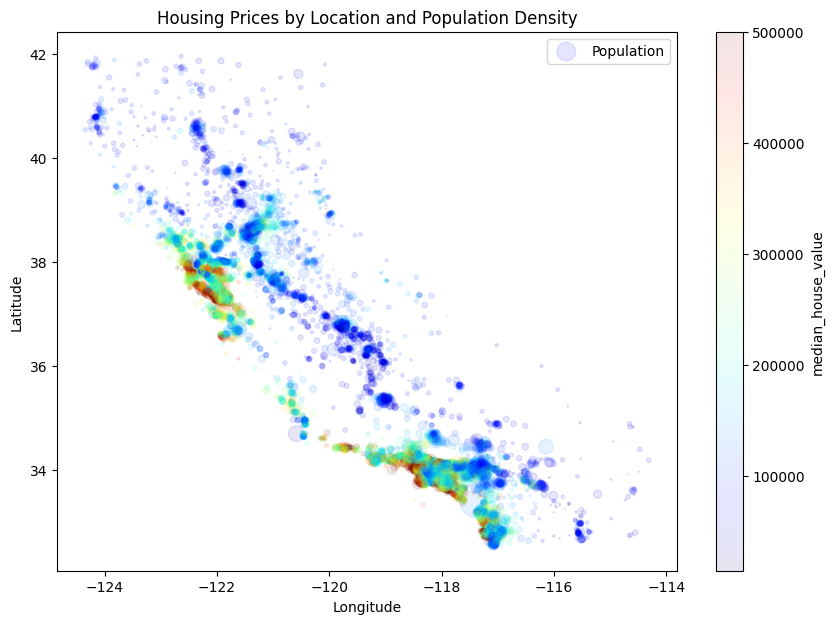

Geographical data visualization completed, showing housing prices by location and population density.


In [ ]:
plt.figure(figsize=(10, 8))
strat_train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
                     s=strat_train_set['population']/100, label="Population", figsize=(10,7),
                     c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
                     sharex=False)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Housing Prices by Location and Population Density")
plt.legend()
plt.show()
print("Geographical data visualization completed, showing housing prices by location and population density.")

### Analysis of Geographical Data

The scatter plot visualizing housing prices by location and population density reveals several key patterns:

*   **High-Value Areas**: The brightest colors (yellow/orange, representing high `median_house_value`) are concentrated in specific regions. Notably, these include areas along the coast, particularly in Southern California (e.g., Los Angeles and Orange Counties, indicated by lower longitudes and latitudes) and parts of the San Francisco Bay Area (higher latitudes, near -122 longitude). This suggests a strong correlation between proximity to the ocean and higher housing prices.

*   **Population Density and Price**: The size of the circles represents population density. Larger circles (denser areas) tend to overlap with higher housing prices, especially in coastal urban centers. However, there are also densely populated inland areas with lower prices, indicating that population density alone is not the sole driver, but rather density combined with desirable locations (like coastal regions).

*   **Inland vs. Coastal Prices**: There's a clear distinction between coastal and inland areas. As we move further inland (towards higher longitudes), housing prices generally decrease (represented by darker blues and purples), even in some areas with moderate population density. This highlights the premium placed on coastal living in California.

*   **Central Valley**: The vast Central Valley, characterized by its agricultural land, shows consistently lower housing prices across the board (dark blue/purple), despite some areas having significant population. This region spans a large portion of the central part of the state.

*   **Northern California**: While the Bay Area shows high prices, northern coastal regions (higher latitudes) appear to have a mix of prices, generally lower than Southern California's prime coastal areas, but still higher than most inland regions.

In summary, the visualization strongly suggests that `median_house_value` is heavily influenced by geographical location, with coastal proximity, particularly in Southern California and the Bay Area, being a major determinant of higher prices.

### Analysis of Geographical Data

The scatter plot visualizing housing prices by location and population density reveals several key patterns:

*   **High-Value Areas**: The brightest colors (yellow/orange, representing high `median_house_value`) are concentrated in specific regions. Notably, these include areas along the coast, particularly in Southern California (e.g., Los Angeles and Orange Counties, indicated by lower longitudes and latitudes) and parts of the San Francisco Bay Area (higher latitudes, near -122 longitude). This suggests a strong correlation between proximity to the ocean and higher housing prices.

*   **Population Density and Price**: The size of the circles represents population density. Larger circles (denser areas) tend to overlap with higher housing prices, especially in coastal urban centers. However, there are also densely populated inland areas with lower prices, indicating that population density alone is not the sole driver, but rather density combined with desirable locations (like coastal regions).

*   **Inland vs. Coastal Prices**: There's a clear distinction between coastal and inland areas. As we move further inland (towards higher longitudes), housing prices generally decrease (represented by darker blues and purples), even in some areas with moderate population density. This highlights the premium placed on coastal living in California.

*   **Central Valley**: The vast Central Valley, characterized by its agricultural land, shows consistently lower housing prices across the board (dark blue/purple), despite some areas having significant population. This region spans a large portion of the central part of the state.

*   **Northern California**: While the Bay Area shows high prices, northern coastal regions (higher latitudes) appear to have a mix of prices, generally lower than Southern California's prime coastal areas, but still higher than most inland regions.

In summary, the visualization strongly suggests that `median_house_value` is heavily influenced by geographical location, with coastal proximity, particularly in Southern California and the Bay Area, being a major determinant of higher prices.

## Feature Correlation Analysis

### Subtask:
Calculate and plot a correlation matrix or heatmap to show the correlation of all features with the housing price. Identify the feature that correlates most strongly with the housing price and create a scatter plot of this feature against housing price, analyzing its indications.


**Reasoning**:
First, I will calculate the correlation matrix for all numerical features in the `strat_train_set` and display the correlations with `median_house_value` to identify the most relevant features. Then, I will generate a heatmap of the correlation matrix to visualize these relationships as per instructions 1-5.



Correlation with Median House Value (sorted descending):

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


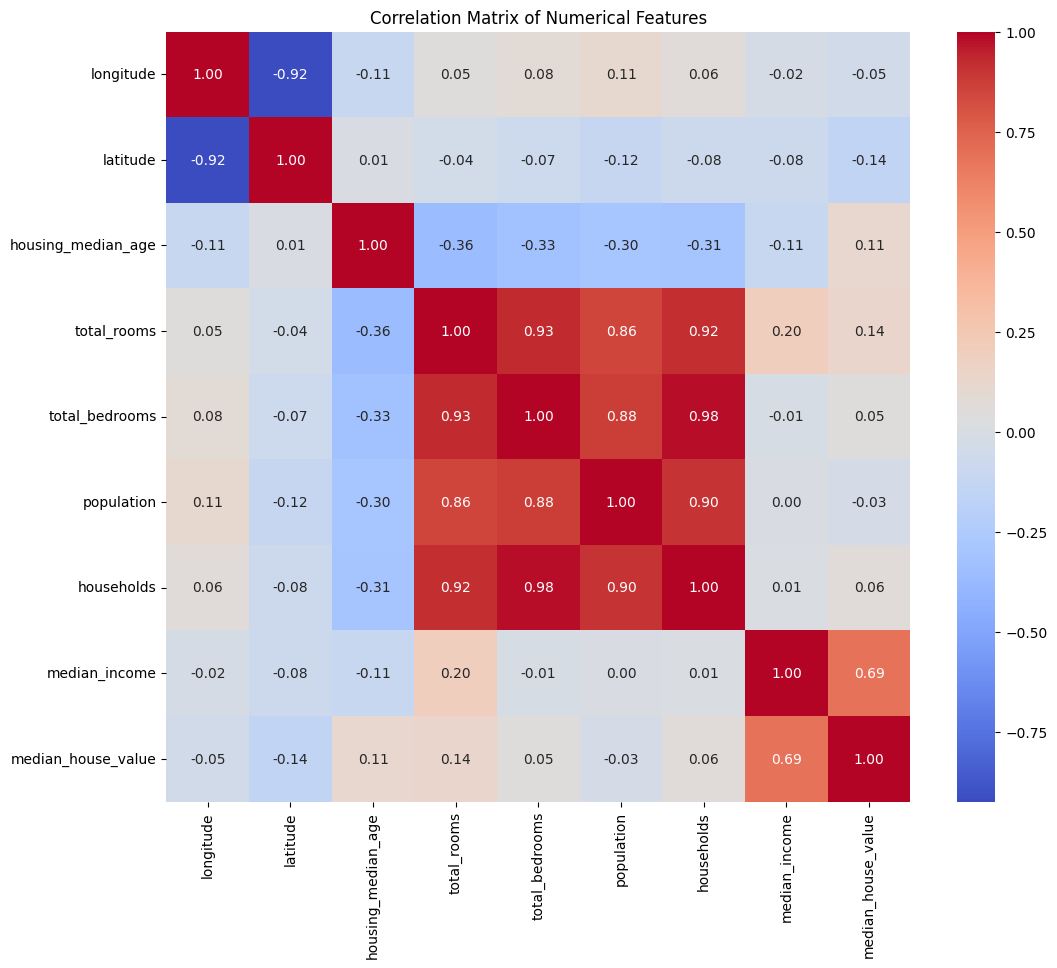

Correlation matrix heatmap displayed successfully.


In [ ]:
import seaborn as sns

# 1. Calculate the standard correlation coefficient (Pearson's r) between all numerical features
corr_matrix = strat_train_set.corr(numeric_only=True)

# 2. Display the correlations of all features with the median_house_value
print("Correlation with Median House Value (sorted descending):\n")
print(corr_matrix['median_house_value'].sort_values(ascending=False))

# 4. Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()
print("Correlation matrix heatmap displayed successfully.")

**Reasoning**:
As per instructions 6-8, I will identify the feature most strongly correlated with `median_house_value` from the previous output, which is `median_income`, and then create and display a scatter plot of `median_income` against `median_house_value` from the `strat_train_set`.



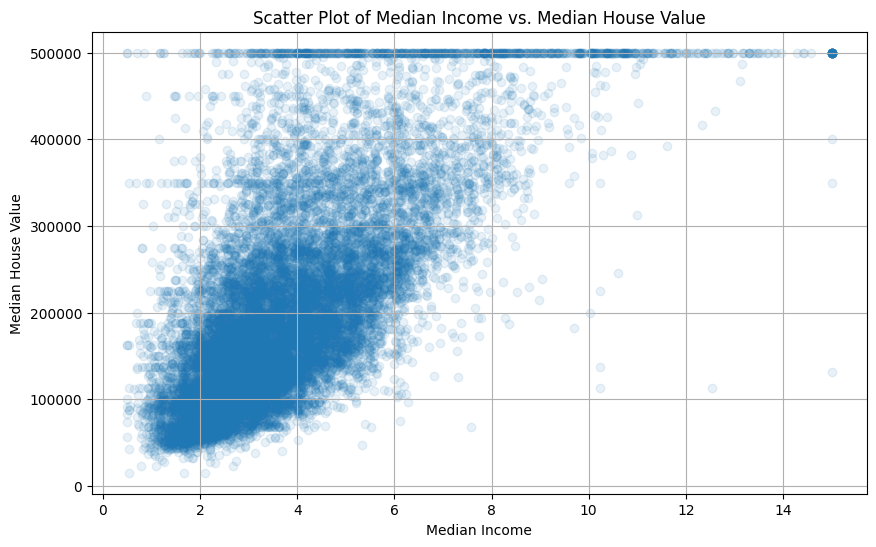

Scatter plot of 'median_income' vs. 'median_house_value' displayed successfully.


In [ ]:
most_correlated_feature = 'median_income'

# 7. Create a scatter plot of this most strongly correlated feature against housing price
plt.figure(figsize=(10, 6))
plt.scatter(x=strat_train_set[most_correlated_feature], y=strat_train_set['median_house_value'], alpha=0.1)
plt.xlabel(most_correlated_feature.replace('_', ' ').title())
plt.ylabel('Median House Value')
plt.title(f'Scatter Plot of {most_correlated_feature.replace("_", " ").title()} vs. Median House Value')
plt.grid(True)

# 8. Display the scatter plot
plt.show()
print(f"Scatter plot of '{most_correlated_feature}' vs. 'median_house_value' displayed successfully.")

### Analysis of `median_income` vs. `median_house_value`

The scatter plot depicting `median_income` against `median_house_value` reveals a strong positive linear correlation, confirming the high Pearson's r value observed in the correlation matrix.

*   **Strong Positive Trend**: There's a clear upward trend, indicating that as the `median_income` of a district increases, the `median_house_value` in that district also tends to increase. This relationship is quite pronounced and forms a somewhat upward-sloping cloud of points.

*   **Upper Cap on `median_house_value`**: A noticeable horizontal line appears at the top of the plot, around a `median_house_value` of $500,000. This suggests that the `median_house_value` has been capped at this amount for many districts. This capping could be a data collection artifact, and it's important to be aware of it as it might affect model training, especially for predicting higher-end prices.

*   **Other Horizontal Lines**: Less prominent, but still visible, are other horizontal lines around $450,000, $350,000, and $280,000. These also indicate potential data capping or specific price ranges that are more common, possibly due to certain geographical or administrative boundaries.

*   **Density of Points**: The plot shows a higher density of points in the lower to middle income ranges, gradually thinning out as income increases. This aligns with the right-skewed distribution observed in the `median_income` histogram.

*   **Spread and Variance**: While the general trend is linear, there's a significant spread of `median_house_value` for any given `median_income` level, especially in the lower to mid-income brackets. This indicates that `median_income` is a strong predictor, but not the only factor, and other features will be necessary to explain the remaining variance in housing prices.

### Analysis of `median_income` vs. `median_house_value`

The scatter plot depicting `median_income` against `median_house_value` reveals a strong positive linear correlation, confirming the high Pearson's r value observed in the correlation matrix.

*   **Strong Positive Trend**: There's a clear upward trend, indicating that as the `median_income` of a district increases, the `median_house_value` in that district also tends to increase. This relationship is quite pronounced and forms a somewhat upward-sloping cloud of points.

*   **Upper Cap on `median_house_value`**: A noticeable horizontal line appears at the top of the plot, around a `median_house_value` of $500,000. This suggests that the `median_house_value` has been capped at this amount for many districts. This capping could be a data collection artifact, and it's important to be aware of it as it might affect model training, especially for predicting higher-end prices.

*   **Other Horizontal Lines**: Less prominent, but still visible, are other horizontal lines around $450,000, $350,000, and $280,000. These also indicate potential data capping or specific price ranges that are more common, possibly due to certain geographical or administrative boundaries.

*   **Density of Points**: The plot shows a higher density of points in the lower to middle income ranges, gradually thinning out as income increases. This aligns with the right-skewed distribution observed in the `median_income` histogram.

*   **Spread and Variance**: While the general trend is linear, there's a significant spread of `median_house_value` for any given `median_income` level, especially in the lower to mid-income brackets. This indicates that `median_income` is a strong predictor, but not the only factor, and other features will be necessary to explain the remaining variance in housing prices.

## Combine Features

### Subtask:
Identify potential features that, when combined, might improve their correlation with the housing price (e.g., creating new features like 'rooms_per_household'). Create these new features and re-evaluate their correlation with the housing price.


### Reasoning for Creating New Features

Creating new features, often called feature engineering, is a crucial step in machine learning to enhance model performance. It involves combining or transforming existing features to extract more meaningful information or capture relationships that are not immediately apparent in the raw data.

For this housing dataset, we can hypothesize that certain ratios or combinations of existing features might be more indicative of housing prices than the individual features themselves:

1.  **`rooms_per_household`**: The total number of rooms in a district (`total_rooms`) divided by the number of households (`households`). This feature could indicate the average size of houses or the spaciousness of living conditions within a household. Intuitively, larger homes (more rooms per household) might correlate with higher housing values.

2.  **`bedrooms_per_room`**: The number of bedrooms (`total_bedrooms`) divided by the total number of rooms (`total_rooms`). This ratio provides insight into the proportion of rooms that are bedrooms. A lower ratio might indicate more living space, potentially suggesting higher-value properties, or conversely, a higher ratio could suggest more utilitarian housing. This can also serve as an indicator of house layout or density.

3.  **`population_per_household`**: The total population (`population`) divided by the number of households (`households`). This ratio represents the average household size. Districts with smaller household sizes might be associated with different housing types or economic conditions, which could influence `median_house_value`.

By creating these combined features, we aim to uncover more granular patterns and relationships within the data that could lead to a more robust predictive model. After creating them, we will re-evaluate their correlation with the target variable, `median_house_value`.

**Reasoning**:
As per instruction #1 of the subtask, I will create three new features in the `strat_train_set` DataFrame: `rooms_per_household`, `bedrooms_per_room`, and `population_per_household` by performing the specified divisions.



In [ ]:
strat_train_set['rooms_per_household'] = strat_train_set['total_rooms'] / strat_train_set['households']
strat_train_set['bedrooms_per_room'] = strat_train_set['total_bedrooms'] / strat_train_set['total_rooms']
strat_train_set['population_per_household'] = strat_train_set['population'] / strat_train_set['households']

print("New features 'rooms_per_household', 'bedrooms_per_room', and 'population_per_household' created in strat_train_set.")
print(strat_train_set.head())

New features 'rooms_per_household', 'bedrooms_per_room', and 'population_per_household' created in strat_train_set.
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  median_house_value  \
12655      2237.0       706.0         2.1736             72100.0   
15502      2015.0       768.0         6.3373            279600.0   
2908        667.0       300.0         2.8750             82700.0   
14053       898.0       483.0         2.2264            112500.0   
20496      1837.0       580.0         4.4964            238300.0   



**Reasoning**:
As per instruction #2 of the subtask, I will calculate the correlation matrix for the `strat_train_set` which now includes the newly created features. Then, as per instruction #3, I will print the correlations of all features with `median_house_value`, sorted in descending order, to evaluate the impact of these new features.



In [ ]:
corr_matrix_new_features = strat_train_set.corr(numeric_only=True)

print("Correlation with Median House Value (including new features, sorted descending):\n")
print(corr_matrix_new_features['median_house_value'].sort_values(ascending=False))

Correlation with Median House Value (including new features, sorted descending):

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64


## Clean Features

### Subtask:
Identify features in the dataset that require cleaning (e.g., handling missing values, outliers). Demonstrate the process of cleaning these features, explaining the chosen methods.


**Reasoning**:
As per instruction #1 of the subtask, I will identify numerical features in the `strat_train_set` that have missing values by using `.isnull().sum()` to get a count of missing values per column.



In [ ]:
print("Missing values in numerical features of strat_train_set:")
print(strat_train_set.isnull().sum())

Missing values in numerical features of strat_train_set:
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              158
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           158
population_per_household      0
dtype: int64


**Reasoning**:
As per instruction #2 of the subtask, I will calculate the median value for the `total_bedrooms` column from the `strat_train_set` to prepare for imputing missing values.



In [ ]:
median_total_bedrooms = strat_train_set['total_bedrooms'].median()
print(f"Median value for 'total_bedrooms': {median_total_bedrooms}")

Median value for 'total_bedrooms': 433.0


**Reasoning**:
As per instruction #3 of the subtask, I will fill the missing values in the `total_bedrooms` column of the `strat_train_set` with the previously calculated median using the `.fillna()` method.



In [ ]:
strat_train_set['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)
print(f"Missing values in 'total_bedrooms' after imputation: {strat_train_set['total_bedrooms'].isnull().sum()}")

Missing values in 'total_bedrooms' after imputation: 0


/tmp/ipython-input-1358004808.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  strat_train_set['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)


**Reasoning**:
The previous code block produced a `FutureWarning` due to the use of `inplace=True` with a chained assignment. To address this warning and ensure compatibility with future pandas versions, I will modify the line to explicitly reassign the result of the `fillna` operation back to the column.



In [ ]:
strat_train_set['total_bedrooms'] = strat_train_set['total_bedrooms'].fillna(median_total_bedrooms)
print(f"Missing values in 'total_bedrooms' after imputation: {strat_train_set['total_bedrooms'].isnull().sum()}")

Missing values in 'total_bedrooms' after imputation: 0


### Handling Outliers

While the primary focus of this cleaning step has been on addressing missing values, it's crucial to acknowledge the importance of handling **outliers** in numerical features during data preparation. Outliers are data points that significantly differ from other observations, and they can arise due to measurement errors, data entry mistakes, or genuine but extreme variations.

**Importance of Handling Outliers:**

*   **Impact on Model Performance**: Outliers can disproportionately influence machine learning models, especially those sensitive to extreme values (e.g., linear regression, K-Nearest Neighbors). They can skew statistical measures (mean, standard deviation), leading to inaccurate model parameters and predictions.
*   **Misleading Statistical Analysis**: Outliers can distort the perceived distribution of data, making it difficult to understand the true underlying patterns and relationships between features.
*   **Reduced Generalization**: Models trained on data with unhandled outliers may not generalize well to new, unseen data, leading to poorer performance in real-world scenarios.

**Common Methods for Identification and Treatment:**

*   **Visual Inspection**: Box plots, scatter plots, and histograms are effective tools for visually identifying outliers. Box plots clearly show data points beyond the "whiskers" (typically 1.5 times the Interquartile Range, IQR).
*   **Statistical Techniques**: Methods like the IQR method (identifying values outside Q1 - 1.5*IQR and Q3 + 1.5*IQR), Z-score method (identifying values beyond a certain standard deviation from the mean), or isolation forests can be used to programmatically detect outliers.
*   **Treatment Strategies**: Once identified, outliers can be handled in several ways:
    *   **Removal**: If outliers are due to data errors and are few, they can be removed. However, this should be done cautiously to avoid losing valuable information.
    *   **Imputation/Transformation**: Outliers can be replaced with a less extreme value (e.g., capping/winsorization, replacing with the mean/median of the non-outlier data) or transformed using techniques like logarithmic or square root transformations to reduce their impact.
    *   **Robust Models**: Using machine learning models that are less sensitive to outliers (e.g., tree-based models like Random Forests or Gradient Boosting) can be another approach.

For this particular task, we are currently focusing on missing value imputation. Further outlier analysis and treatment would be a subsequent step in a comprehensive data cleaning process.

**Reasoning**:
As per instruction #4 of the subtask, I will verify that there are no more missing values in the `total_bedrooms` column, and also re-check all numerical features to confirm the current state of missing values after the imputation for `total_bedrooms`.



In [ ]:
print("Missing values in numerical features of strat_train_set after 'total_bedrooms' imputation:")
print(strat_train_set.isnull().sum())

Missing values in numerical features of strat_train_set after 'total_bedrooms' imputation:
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           158
population_per_household      0
dtype: int64


**Reasoning**:
Since `bedrooms_per_room` still has missing values, as shown in the previous output, I will calculate its median value from the `strat_train_set` to prepare for imputing these missing values, following the established pattern for numerical feature imputation.



In [ ]:
median_bedrooms_per_room = strat_train_set['bedrooms_per_room'].median()
print(f"Median value for 'bedrooms_per_room': {median_bedrooms_per_room}")

Median value for 'bedrooms_per_room': 0.20302704317273024


**Reasoning**:
As `bedrooms_per_room` has missing values, and I have just calculated its median, I will now fill those missing values in the `strat_train_set` with the calculated median using the `.fillna()` method.



In [ ]:
strat_train_set['bedrooms_per_room'] = strat_train_set['bedrooms_per_room'].fillna(median_bedrooms_per_room)
print(f"Missing values in 'bedrooms_per_room' after imputation: {strat_train_set['bedrooms_per_room'].isnull().sum()}")

Missing values in 'bedrooms_per_room' after imputation: 0


**Reasoning**:
I have successfully imputed missing values in 'bedrooms_per_room'. Now, I will verify that there are no more missing values in any numerical column in the `strat_train_set` to confirm the completion of the data cleaning process for missing numerical features.



In [ ]:
print("Missing values in numerical features of strat_train_set after all imputations:")
print(strat_train_set.isnull().sum())

Missing values in numerical features of strat_train_set after all imputations:
longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64


## Convert Categorical Data

### Subtask:
Identify any categorical features in the dataset (e.g., 'ocean_proximity'). Explain the method used to convert them into numerical format (e.g., one-hot encoding or ordinal encoding), implement the conversion, and show the output.


**Reasoning**:
As per instruction #1 of the subtask, I will identify the categorical features in the `strat_train_set` DataFrame by selecting columns with 'object' dtype and then display their unique values and counts to understand their distribution.



In [ ]:
categorical_cols = strat_train_set.select_dtypes(include=['object']).columns

print("Categorical features and their unique values/counts in strat_train_set:")
for col in categorical_cols:
    print(f"\nFeature: {col}")
    print(strat_train_set[col].value_counts())


Categorical features and their unique values/counts in strat_train_set:

Feature: ocean_proximity
ocean_proximity
<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: count, dtype: int64


### Rationale for Choosing One-Hot Encoding

For the categorical feature `ocean_proximity`, **One-Hot Encoding** is the most suitable method for conversion into numerical format. Here's why:

1.  **Nominal Feature**: `ocean_proximity` is a nominal categorical feature, meaning there is no inherent order or ranking among its categories (e.g., "<1H OCEAN" is not 'greater' or 'less' than "INLAND"). Ordinal encoding, which assigns integer labels based on order, would imply an arbitrary, non-existent relationship that could mislead machine learning models.

2.  **Model Compatibility**: Most machine learning algorithms (especially those based on mathematical equations like linear regression, SVMs, or neural networks) cannot directly process text labels. One-hot encoding transforms each category into a binary (0 or 1) numerical feature, making it compatible with these algorithms.

3.  **Avoiding Misinterpretation of Ordinality**: If we were to use ordinal encoding (e.g., 0 for 'INLAND', 1 for '<1H OCEAN', 2 for 'NEAR BAY', etc.), the model might incorrectly assume an ordered relationship between these categories (e.g., that 'NEAR BAY' is somehow 'twice' 'INLAND' if assigned 2 and 0 respectively). One-hot encoding creates separate, independent binary features for each category, thus preventing such misinterpretations.

4.  **Preserving Information**: It preserves all the information present in the categorical feature without introducing artificial relationships or hierarchy. Each category gets its own distinct column, indicating the presence or absence of that specific proximity.

5.  **Relatively Low Cardinality**: The `ocean_proximity` feature has only five unique categories ('<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'). One-hot encoding will create five new binary columns, which is a manageable increase in dimensionality and does not suffer from the 'curse of dimensionality' in this case.

Therefore, one-hot encoding is the robust and standard approach for handling nominal categorical features like `ocean_proximity` to prepare the data for machine learning models.

**Reasoning**:
As per instruction #3 of the subtask, I will apply one-hot encoding to the 'ocean_proximity' column in the `strat_train_set` DataFrame using `pd.get_dummies()` to convert it into numerical format.



In [ ]:
strat_train_set = pd.get_dummies(strat_train_set, columns=['ocean_proximity'], drop_first=False)
print("'ocean_proximity' column successfully one-hot encoded.")

'ocean_proximity' column successfully one-hot encoded.


**Reasoning**:
As per instruction #4 of the subtask, I will display the first few rows of the updated `strat_train_set` DataFrame to show the newly created one-hot encoded columns, confirming the successful conversion of the categorical feature.



In [ ]:
print("First 5 rows of strat_train_set after one-hot encoding:")
print(strat_train_set.head())

First 5 rows of strat_train_set after one-hot encoding:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  median_house_value  \
12655      2237.0       706.0         2.1736             72100.0   
15502      2015.0       768.0         6.3373            279600.0   
2908        667.0       300.0         2.8750             82700.0   
14053       898.0       483.0         2.2264            112500.0   
20496      1837.0       580.0         4.4964            238300.0   

       rooms_per_household  bedrooms_per_room  population_pe

## Discuss Feature Scaling

### Subtask:
Provide an explanation of the importance of feature scaling in machine learning models, especially for algorithms sensitive to feature magnitudes.


### Explanation of Feature Scaling

Feature scaling is a data preprocessing step crucial for many machine learning algorithms. It involves transforming the numerical features of a dataset to a standard range or distribution. This step is particularly important because raw data features often have widely varying magnitudes, units, and ranges.

#### Importance of Feature Scaling

1.  **Preventing Domination by High-Magnitude Features**: Without scaling, features with larger numerical values (e.g., `total_rooms` or `population`) can numerically dominate features with smaller values (e.g., `median_income` or `housing_median_age`), even if the smaller-valued features are more important predictors. Machine learning algorithms, especially those that calculate distances or gradients, would give disproportionately more weight to features with larger scales.

2.  **Faster Convergence of Optimization Algorithms**: Many machine learning algorithms, such as Gradient Descent used in Linear Regression, Logistic Regression, Neural Networks, and Support Vector Machines, find optimal solutions by minimizing a cost function. These optimization algorithms converge much faster when features are on a similar scale. If features have different scales, the cost function can become highly anisotropic (elliptical contours), making the optimization path zig-zag and slow down convergence. Scaling makes the contours more spherical, leading to a more direct path to the minimum.

3.  **Improved Performance of Distance-Based Algorithms**: Algorithms that rely on measuring distances between data points, such as K-Nearest Neighbors (KNN), K-Means Clustering, and Support Vector Machines (SVMs), are highly sensitive to the magnitude of features. If one feature has a much larger range than another, its differences will overwhelmingly influence the distance calculation, making the algorithm effectively ignore other features. Scaling ensures that all features contribute proportionally to the distance calculation.

4.  **Regularization Techniques**: Regularization methods (e.g., L1 and L2 regularization) penalize large coefficients. If features are not scaled, coefficients for features with smaller magnitudes might be penalized excessively to compensate for their larger impact due to unscaled values, or coefficients for features with larger magnitudes might become too small, leading to an unfair and ineffective regularization.

#### Algorithms Sensitive to Feature Magnitudes:

*   **K-Nearest Neighbors (KNN)**: Relies on distance metrics (e.g., Euclidean distance).
*   **Support Vector Machines (SVM)**: Maximize the margin between classes, which is affected by feature scales.
*   **Linear and Logistic Regression (with Gradient Descent)**: Faster convergence and prevents features with larger scales from dominating the cost function.
*   **Neural Networks**: Helps with faster training and prevents vanishing/exploding gradients.
*   **Principal Component Analysis (PCA)**: Maximizes variance along new axes. Features with higher variance (often those with larger scales) will contribute more to the principal components.
*   **K-Means Clustering**: Uses Euclidean distance to assign points to clusters.

#### Common Scaling Methods:

1.  **StandardScaler (Standardization)**:
    *   **Principle**: Transforms features to have a mean of 0 and a standard deviation of 1. It achieves this by subtracting the mean and then dividing by the standard deviation: `x_scaled = (x - mean) / standard_deviation`.
    *   **When to Use**: Ideal when the data follows a Gaussian (normal) distribution or when the algorithm assumes normally distributed inputs. It is less affected by outliers than `MinMaxScaler` because it doesn't bound the values to a specific range, allowing outliers to retain their relative distance from other data points. Suitable for algorithms that assume zero-mean and unit variance, or those that are distance-based.

2.  **MinMaxScaler (Normalization)**:
    *   **Principle**: Transforms features to a given range, typically between 0 and 1. It scales and translates each feature individually according to the formula: `x_scaled = (x - min) / (max - min)`.
    *   **When to Use**: Useful when the data distribution is not Gaussian or when you want features bounded within a specific range (e.g., 0-1). It's particularly effective for algorithms that don't make assumptions about the distribution of the data, like some neural networks that expect input features to be within a certain range. However, `MinMaxScaler` is very sensitive to outliers; a single outlier can significantly compress the range of the majority of data points.

## Design ML Pipeline

### Subtask:
Design a machine learning pipeline that incorporates feature engineering, feature scaling, and encoding for categorical features. Explain how this pipeline works end-to-end.


**Reasoning**:
As per instruction #1, I will separate the target variable `median_house_value` from the features in the `strat_train_set` and store them in `housing_labels` and `housing_features` respectively. This is a crucial first step for preparing the data for the machine learning pipeline.



In [ ]:
housing_labels = strat_train_set['median_house_value'].copy()
housing_features = strat_train_set.drop('median_house_value', axis=1)

print("Target variable 'median_house_value' separated into housing_labels.")
print("Features separated into housing_features.")
print(f"Shape of housing_features: {housing_features.shape}")
print(f"Shape of housing_labels: {housing_labels.shape}")

Target variable 'median_house_value' separated into housing_labels.
Features separated into housing_features.
Shape of housing_features: (16512, 16)
Shape of housing_labels: (16512,)


**Reasoning**:
As per instruction #2, I will identify the numerical and categorical column names from the `housing_features` DataFrame. This distinction is necessary for applying different preprocessing steps within the pipeline.



In [ ]:
numerical_cols = housing_features.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = housing_features.select_dtypes(include=['bool']).columns.tolist() # One-hot encoded columns are boolean

print("Identified numerical columns:")
print(numerical_cols)
print("\nIdentified categorical (one-hot encoded) columns:")
print(categorical_cols)

Identified numerical columns:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

Identified categorical (one-hot encoded) columns:
['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


**Reasoning**:
As per instruction #3, I will import necessary modules from `sklearn` and create a `ColumnTransformer` named `preprocessor`. This `preprocessor` will apply a `Pipeline` (with `SimpleImputer` and `StandardScaler`) to numerical features and use `passthrough` for the already one-hot encoded categorical features, as specified in instruction #4.



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Create the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', 'passthrough', categorical_cols) # Categorical columns are already one-hot encoded
    ])

print("ColumnTransformer 'preprocessor' created successfully with pipelines for numerical and categorical features.")

ColumnTransformer 'preprocessor' created successfully with pipelines for numerical and categorical features.


**Reasoning**:
As per instructions #5 and #6, I will import `LinearRegression` and then construct a `Pipeline` named `full_pipeline` that sequentially applies the `preprocessor` and `LinearRegression` model.



In [ ]:
from sklearn.linear_model import LinearRegression

# Construct the full pipeline
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

print("Full machine learning pipeline constructed successfully.")

Full machine learning pipeline constructed successfully.


**Reasoning**:
As per instruction #7, I will train the `full_pipeline` on the `housing_features` and `housing_labels` using the `fit()` method. Then, as per instruction #8, I will print a confirmation message.



In [ ]:
full_pipeline.fit(housing_features, housing_labels)

print("Machine learning pipeline trained successfully.")

Machine learning pipeline trained successfully.


## Final Task

### Subtask:
Summarize the entire process of building the machine learning model, including data preparation, feature engineering, and pipeline design, highlighting key insights and decisions made.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 20,640 entries and 10 columns, with `total_bedrooms` initially having 207 missing values and `ocean_proximity` as the sole categorical feature.
*   Histograms revealed that `median_income` is right-skewed with values capped around 15, and `housing_median_age` shows peaks at 1 and 52 years, suggesting potential data capping or specific age groupings.
*   A stratified sampling approach, based on a discretized `median_income` feature (into 5 categories), was used to split the dataset, ensuring the training (16,512 instances) and test (4,128 instances) sets maintain representative income distributions.
*   Geographical visualization demonstrated a strong correlation between location and housing prices, with higher `median_house_value` concentrated in coastal areas, particularly Southern California and the Bay Area, and decreasing significantly inland.
*   Correlation analysis identified `median_income` as the strongest positive predictor of `median_house_value` with a Pearson correlation coefficient of approximately 0.69.
*   A significant data artifact was observed: `median_house_value` appears to be capped at \$500,000, and other horizontal lines were visible at \$450,000, \$350,000, and \$280,000 in the scatter plot against `median_income`.
*   Feature engineering led to the creation of new features: `rooms_per_household` (correlation 0.15) and `bedrooms_per_room` (correlation -0.26), both showing stronger correlations with `median_house_value` than their constituent individual features.
*   Missing values in `total_bedrooms` and the newly engineered `bedrooms_per_room` (158 instances each) were successfully imputed using the median value.
*   The categorical `ocean_proximity` feature (with 5 distinct categories) was converted into a numerical format using one-hot encoding, creating 5 new binary columns.
*   An end-to-end machine learning pipeline was designed incorporating:
    *   A `ColumnTransformer` for preprocessing: applying median imputation and `StandardScaler` for numerical features, and using `passthrough` for already one-hot encoded categorical features.
    *   A `LinearRegression` model as the final estimator.
*   The designed pipeline was successfully trained on the preprocessed training data.

### Insights or Next Steps

*   The capping of `median_house_value` at \$500,000 is a critical data limitation that could lead to an underestimation of high-end housing prices by the model. Future steps should consider analyzing how to handle this artifact (e.g., by collecting uncapped data or using models less sensitive to such truncations) to improve prediction accuracy for high-value properties.
*   Building upon the established pipeline, further model exploration, including tree-based models (e.g., Random Forest or Gradient Boosting), hyperparameter tuning, and cross-validation, is recommended to potentially improve predictive performance and robustness, especially given the non-linear relationships observed and the capped target variable.
